# Chapter 4: Training Models

## Setup

First, let's import a few common modules, ensure *MatplotLib* plots figures inline and prepare a function to save the figures:

In [1]:
# Common Imports
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called *bias term*(also called the *intercept term*), as shown below

**Equation 4-1: Linear Regression model prediction**  

$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $

* $ \hat{y} $ is the predicted value
* $ n $ is the number of features
* $ x_i $ is the $ i^{th} $ feature value
* $ \theta_j $ is the $ j^{th} $ parameter (including the bias term $ \theta_0 $ and the feature weights $ \theta_1, \theta_2, ..., \theta_n $

This can be written much more concisely using a vectorized form, as shown below:

**Equation 4-2: Linear Regression model prediction (vectorized form)**

$ \hat{y} = h_\theta (x) = \theta^T . x $

Recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well the model fits the training data. The most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression model, you need to find the value of $ \theta $ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

The MSE of a Linear Regression hypothesis $ h_\theta $ on a training set $ \mathbf{X} $ is calculated below

**Equation 4-3: *MSE cost fuction* for a *Linear Regression* model**

$ MSE( \mathbf{X}, h_\theta ) = \frac{1}{m} \sum \limits _{i = 1} ^{m} ( \theta^T . x^{(i)} - y^{(i)})^2 $

We write $ h_\theta $ instead of just $ h $ in order to make it clear that the model is parameterized by vector $ \theta $. To simplify notations, we will just write $ MSE( \theta ) $ instead of $ MSE( \mathbf{X}, h_\theta ) $.  

## The Normal Equation

To find the value $ \theta $ that minimizes the cost function, there is *closed-form solution* - a mathematical equation that gives the result directly. This is called the *Normal Equation*.

**Equation 4-4: Normal Equation**

$ \hat{ \theta } = ( \mathbf{X}^T . \mathbf{X} )^{-1}. \mathbf{X}^T . y $

* $ \hat{ \theta } $ is the value of $ \theta $ that minimizes the cost function.
* $ y $ is the vector of target values containing $ y^{(1)} $ to $ y^{(m)} $.

Let's generate some linear-looking data to test this equation on:

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


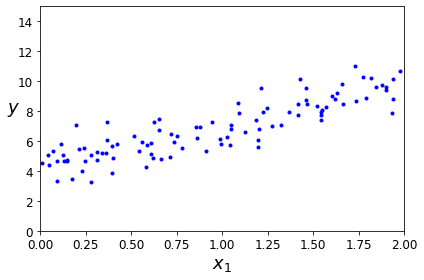

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Let's compute $ \theta $ using the Normal Equation. We will use the `inv()` function from NumPy's Linear Algebra module(`np.linalg`) to compute the inverse of a matrix, and the `dot()` method for matrix multiplication:

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is $ y = 4 + 3x_0 + Gaussian $ $ Noise $.

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

Close enough but the noise made it impossible to recover the exact parameters of the original function.

Now we can make predictions using $ \hat{ \theta } $ :

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Let's plot this models predictions:

Saving figure predicted_line_using_normal_equation


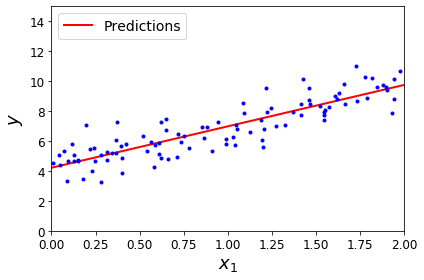

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("predicted_line_using_normal_equation")
plt.show()

The equivalent code in Scikit-Learn looks like this:

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

Scikit-Learn separates the bias term (`intercept_`) from the feature weights(`coef_`).

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which we can call directly:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $ \mathbf{X}^+ \mathbf{y} $, where $ \mathbf{X}^+ $ is the *pseudoinverse* of $ \mathbf{X} $ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

**Note**: the first releases of the book implied that the `LinearRegression` class was based on the Normal Equation. This was an error, it is based on the pseudoinverse, which ultimately relies on the SVD matrix decomposition of $\mathbf{X}$ (see chapter 8 for details about the SVD decomposition). Its time complexity is $O(n^2)$ and it works even when $m < n$ or when some features are linear combinations of other features (in these cases, $\mathbf{X}^T \mathbf{X}$ is not invertible so the Normal Equation fails). However, this does not change the rest of the description of the `LinearRegression` class, in particular, it is based on an analytical solution, it does not scale well with the number of features, it scales linearly with the number of instances, all the data must fit in memory, it does not require feature scaling and the order of the instances in the training set does not matter.

## Computational Complexity

The Normal Equation computes the inverse of $ \mathbf{X}^T . \mathbf{X} $, which is an $ n \times n $(where $ n $ is the number of features). The *computational complexity* of inverting such a matrix is typically about $ \mathbf{O}(n^{2.4}) $ to $ \mathbf{O}(n^{3}) $ (depending on the implementation).

The Normal Equation gets very slow when the number of features grows large (e.g. 100,000).

Now we will look at very different ways to train a Linear Regression model, better suited for cases where there are a large number of features, or too many training instances to fit in memory.

## Gradient Descent

### Batch Gradient Descent

To implement Gradient Descent, we need to compute the gradient of the cost function  with regards to each model parameter $ \theta_j $. In other words, we need to calculate how much the cost function will change if we change $ \theta_j $ just a little bit. This is called a *partial derivative*. The equation below computes the partial derivative of the cost function with regards to parameter $ \theta_j $, noted $ \frac{ \partial }{ \partial \theta_j }MSE( \theta ) $.

**Equation 4-5: *Partial derivatives* of the cost function**.

$ \frac{ \partial }{ \partial \theta_j }MSE( \theta ) = \frac{2}{m} \sum \limits _{i=1} ^{m} ( \theta^T .x^{(i)} - y^{(i)} ) x_j^{(i)} $

Instead of computing these gradients individually, we can use the equation below to compute them all in one go. The gradient vector, noted $ \nabla_\theta MSE( \theta ) $, contains all the partial derivatives of the cost function (one for each model parameter).

**Equation 4-6. Gradient vector of the cost function**

$$ \nabla_\theta MSE( \theta ) = \left( \begin{array}{c} \frac{ \partial }{ \partial \theta_0 }MSE( \theta ) \\ \frac{ \partial }{ \partial \theta_1 }MSE( \theta ) \\ . \\ . \\ . \\ \frac{ \partial }{ \partial \theta_n }MSE( \theta ) \end{array} \right) = \frac{2}{m} \mathbf(X)^T .( \mathbf{X} . \theta - y) $$

This formula uses the whole batch of training data at every step (that's why the algorithm is called *Batch Gradient Descent*). As a result it is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation.

Once we have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $ \nabla_\theta MSE( \theta ) $ from $ \theta $. This is where the learning rate $ \eta $ comes into play: multiply the gradient vector by $ \eta $ to determine the size of the downhill step:

**Equation 4-7. *Gradient Descent step***

$ \theta^{(next step)} = \theta - \eta \nabla_\theta MSE( \theta ) $

Let's look at a quick implementation of this algorithm:

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

Let's look at the resulting theta:

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

That’s exactly what the Normal Equation found. Let's see how the model looks with different learning rates $ \eta $:

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


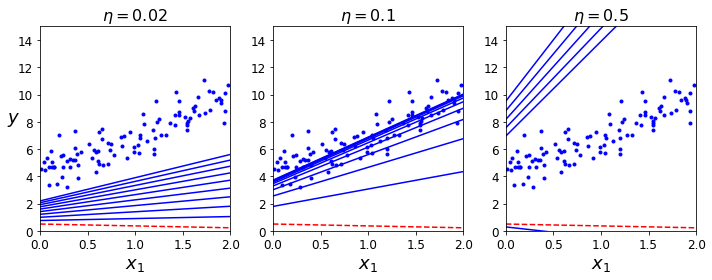

In [15]:
np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take along time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping allover the place and actually getting further and further away from the solution at every step.

To find a good learning rate, we can use grid search . However, we may want to limit the number of iterations so that grid search can eliminate models that take too long to converge. We may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore.

A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny — that is, when its norm becomes smaller than a tiny number $ \mathbf{ε} $(called the tolerance) — because this happens when Gradient Descent has (almost) reached the minimum.

## Convergence Rate

When the cost function is convex and its slope does not change abruptly, it can be shown that Batch Gradient Descent with a fixed learning rate has a *convergence rate* of $ O \left( \frac{1}{iterations} \right) $. In other words, if you divide the tolerance $ \epsilon $, then the algorithm will have to run about 10 times more iterations.

## Stochastic Gradient Descent

This code implements *Stochastic Gradient Descent* using a simple learning schedule:

Saving figure sgd_plot


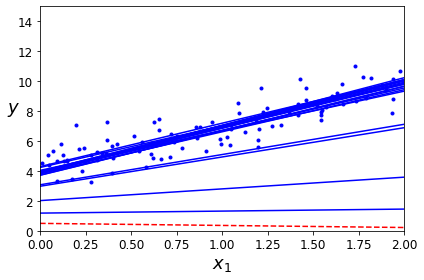

In [16]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
m = len(X_b)
theta_path_sgd = []
np.random.seed(42)

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()

In [17]:
theta

array([[4.21076011],
       [2.74856079]])

While the *Batch Gradient Descent* code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a fairly good solution.

To perform Linear Regression using **SGD** with Scikit-Learn, you can use the `SGDRegressor` class, which defaults to optimizing the squared error cost function. The following code runs 50 epochs, starting with a learning rate of 0.1 (`eta0=0.1`), using the default learning schedule (different from the preceding one),and it does not use any regularization (`penalty=None`):

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

Let's see the solution

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

## Mini-batch Gradient Descent 

This code implements *Mini-batch Gradient Descent* using a simple learning schedule:

In [20]:
theta_path_mgd = []
m = len(X_b)

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

Let's check the output:

In [21]:
theta

array([[4.25214635],
       [2.7896408 ]])

Let's check the path taken by the three Gradient Descent algorithms in parameter space during training. 

In [22]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Let's plot the paths:

Saving figure gradient_descent_paths_plot


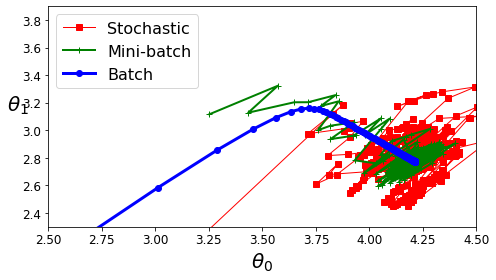

In [23]:
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

They all end up near the minimum, but *Batch GD*’s path actually stops at the minimum, while both *Stochastic GD* and *Mini-batch GD* continue to walk around. However, *Batch GD* takes a lot of time to take each step, and *Stochastic GD* and *Mini-batch GD* would also reach the minimum if a good *learning schedule* is used.

## Polynomial Regression

We can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called *Polynomial Regression*.

Let’s look at an example. First, let’s generate some nonlinear data, based on a simple quadratic equation:

In [24]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # y = ax^2 + bx + c

Saving figure quadratic_data_plot


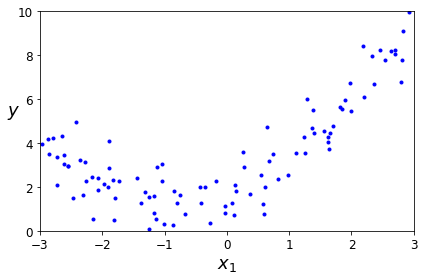

In [25]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

We'll use Scikit-Learn’s `PolynomialFeatures` class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [27]:
X_poly[0]

array([-0.75275929,  0.56664654])

`X_poly` now contains the original feature of `X` plus the square of this feature. Now you can fit a `LinearRegression` model to this extended training data:

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Not bad: the model estimates $ \hat{y} = 0.56 x_1^2 + 0.93 x_1 + 1.78 $  when in fact the original function was $ \hat{y} = 0.5 x_1^2 + 1. x_1 + 2 + Gaussian $ $ Noise $.

Let's plot the prediction line:

Saving figure quadratic_predictions_plot


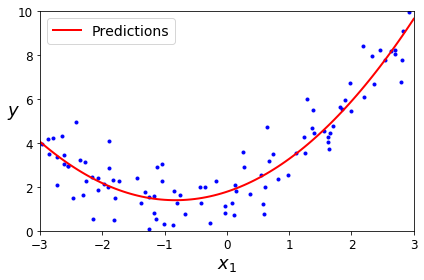

In [29]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

## Learning Curves

If we perform high-degree *Polynomial Regression*, we will likely fit the training data much better than with plain *Linear Regression*. Let's apply a 300-degree polynomial model to the preceding training data, and compare the result with a pure linear model and a quadratic model (2nd-degree polynomial).

Saving figure high_degree_polynomials_plot


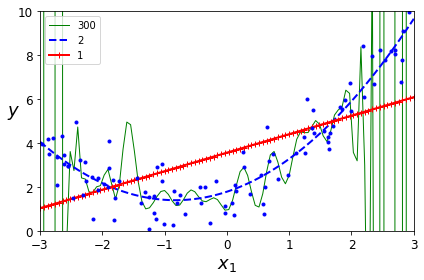

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline ([
        ("poly_features",  polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

This high-degree *Polynomial Regression* model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model.It makes sense since the data was generated using a quadratic model, but in general you won’t know what function generated the data.

So how can we decide how complex your model should be?

In Chapter 2 we used cross-validation to get an estimate of a model’s generalization performance. Another way is to look at the *learning curves*: these are plots of the model’s performance on the training set and the validation set as a function of the training set size. To generate the plots, simply train the model several times on different sized subsets of the training set. 

The following code defines a function that plotsthe learning curves of a model given some training data:

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

Let's look at the learning curves of the plain Linear Regression model:

Saving figure underfitting_learning_curves_plot


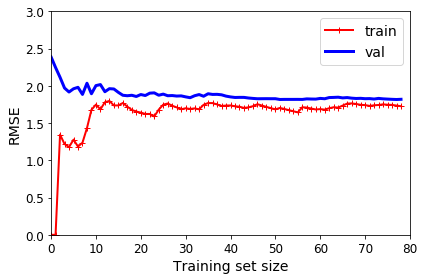

In [32]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
save_fig("underfitting_learning_curves_plot")
plt.show()

This model is underfitting the validation data.

Now let's look at the learning curves of a 10th-degree polynomial model on the same data:

Saving figure learning_curves_plot


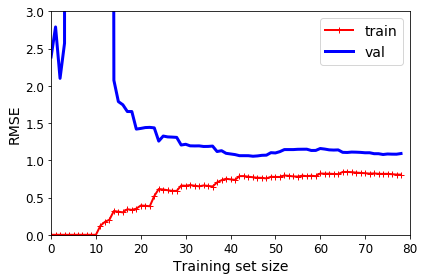

In [33]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig("learning_curves_plot")
plt.show()

This model is overfitting the cross validation data. One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.

A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.For a linear model, regularization is typically achieved by constraining the weights of the model.

### Ridge Regression

*Ridge Regression*(also called *Tikhonov regularization*) is a regularized version of *Linear Regression*: a regularization term equal to $ \alpha \sum \limits _{i=1} ^{n} \theta_i^2 $ is added to the cost function.

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

The hyperparameter $ \alpha $ controls how much you want to regularize the model. If $ \alpha = 0 $ then Ridge Regression is just Linear Regression. If $ \alpha $ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean. The equation below presents the Ridge Regression cost function:

**Equation 4-8. Ridge Regression cost function**

$ J( \theta ) = MSE( \theta ) + \alpha \sum \limits _{i=1} ^{n} \theta_i^2 $

It is important to scale the data (e.g., using a `StandardScaler`) before performing Ridge Regression, as it is sensitive to the scale of the input features. As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. Equation below shows the closed-form solution:

**Equation 4-9. Ridge Regression closed-form solution**

$ \hat{ \theta } = \left( \mathbf{X}^T . \mathbf{X} + \alpha \mathbf{A} \right)^{-1} . \mathbf{X}^T . \mathbf{y} $

Let's perform Ridge Regression with Scikit-Learn using a closed-form solution (a variant of Equation 4-9 using a matrix factorization technique by André-Louis Cholesky):

In [34]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

And using Stochastic Gradient Descent:

In [35]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.83884487])

Alternatively we can use Ridge class with the "sag" solver. Stochastic Average GD is a variant of SGD.

In [36]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82335753]])

Let's train several Ridge models trained on some linear data using  different $ \alpha $ values and plot the values:

Saving figure ridge_regression_plot


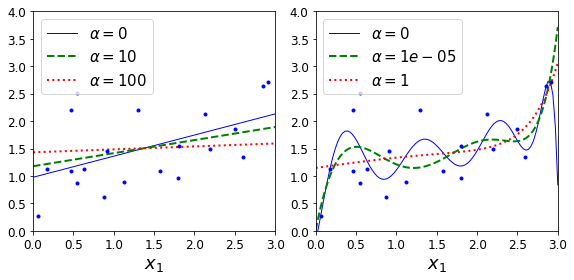

In [37]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

### Lasso Regession

*Least Absolute Shrinkage and Selection Operator Regression* (*Lasso Regression*) is another regularized version of Linear Regression: just like Ridge Regression, it adds regularization term to the cost function, but it uses $ l_1 $ norm of the weight vector instead of half the square of the $ l_2 $ norm:

**Equation 4-10. *Lasso Regression* cost function**

$ J( \theta ) = MSE( \theta ) + \alpha \sum \limits _{i=1} ^{n} \mid \theta_i \mid $

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero). The code below shows the Ridge models with Lasso models in both linear (left) and polynomial regression (right) and also uses different α values:

Saving figure lasso_regression_plot


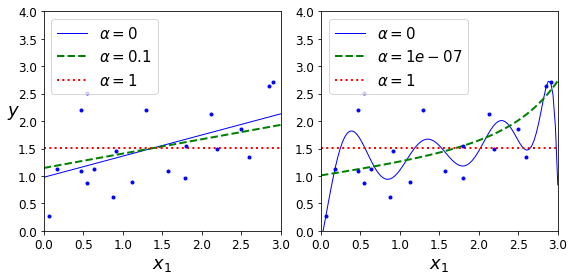

In [38]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

save_fig("lasso_regression_plot")
plt.show()

The dashed line in the right plot(with α = 10-7) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

The Lasso cost function is not differentiable at $ \theta_i = 0 $ (for $ i = 1, 2, , n $), but Gradient Descent still works fine if we use a subgradient vector $ g $ instead when any $ \theta_i = 0 $. Equation below shows a subgradient vector equation you can use for Gradient Descent with the Lasso cost function:

**Equation 4-11. Lasso Regression subgradient vector**

$$g( \theta, J) = \nabla_\theta MSE( \theta ) + \alpha \left(\begin{array}{c} sign( \theta_1 ) \\ sign( \theta_2 ) \\ . \\ . \\ sign( \theta_n ) \end{array}\right)$$ **where**  $$sign( \theta_i ) = \begin{cases} \begin{array}{c} -1, & if & \theta_i < 0 \\ 0, & if & \theta_i = 0 \\ +1, & if & \theta_i > 0 \end{array} \end{cases}$$

We can use the Scikit-Learn's `Lasso` class:

In [39]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

We can also use `SGDRegressor(penalty="l1")`:

In [40]:
from sklearn.linear_model import SGDRegressor

sgd_l1_reg = SGDRegressor(penalty="l1")
sgd_l1_reg.fit(X, y.ravel())
sgd_l1_reg.predict([[1.5]])

array([1.46726685])

### Elastic Net

*Elastic Net* is a middle ground between *Ridge Regression* and *Lasso Regression*. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and we can control the mix ratio $ r $. When $ r = 0 $, Elastic Net is equivalent to *Ridge Regression*, and when $ r = 1 $, it is equivalent to *Lasso Regression*.

**Equation 4-12. Elastic net cost function**

$ J( \theta ) = MSE( \theta ) + r \alpha \sum _{i=1} ^{n} \mid \theta_i \mid + \frac{1 - r}{2} \alpha \sum _{i=1} ^{n} \theta_i^2 $

We can use Scikit-Learn's `ElasticNet` to implement Elastic Net Regression (`l1_ration` corresponds to the mix ratio $ r $): 

In [41]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*. Below is a basic implementation of early stopping: 

In [42]:
from sklearn.base import clone

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state=10)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [43]:
best_epoch, best_model

(444,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

Note that with `warm_start=True`, when the `fit()` method is called, it just continues training where it left off instead of restarting from scratch.

Saving figure early_stopping_plot


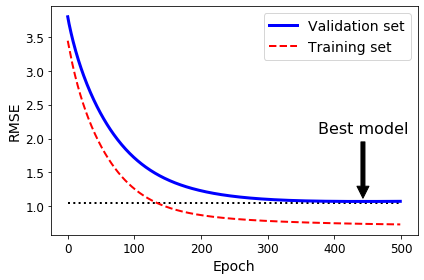

In [44]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
t = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, penalty=None, eta0=0.0005, warm_start=True, learning_rate="constant", random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model', xy=(best_epoch, best_val_rmse), xytext=(best_epoch, best_val_rmse + 1), ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)

best_val_rmse -= 0.03 # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

The figure above shows a high-degree Polynomial Regression model being trained using Batch Gradient Descent. As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set. However, after a while the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hintoncalled it a **“beautiful free lunch”**.

## Logistic Regression

Some regression algorithms can be used for classification as well. **Logistic Regression** (also called *Logit Regression*) is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

### Estimating Probabilities

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

**Equation 4-13. Logistic Regression model estimated probability (vectorized form)**

$ \hat{p} = h_\theta ( \mathbf{x} ) = \sigma ( \theta^T . \mathbf{x} ) $

Noted that $ \sigma (.) $ -- is a **sigmoid function** that outputs a number between 0 and 1. It is defined in the equation below:

**Equation 4-14. Logistic Function**

$ \sigma = \frac{1}{1 + e^{-t}} $

Once the Logistic Regression model has estimated the probability $ \hat{p} = h_\theta ( \mathbf{x} ) $ that an instance $ x $ belongs to the positive class, it can make its prediction $ \hat{y} $ easily.

**Equation 4-15. Logistic Regression model prediction**

$$ \hat{y} = \begin{cases} 0 & if & \hat{p} < 0.5, \\ 1 & if & \hat{p} \ge 0.5. \end{cases} $$

Saving figure logistic_function_plot


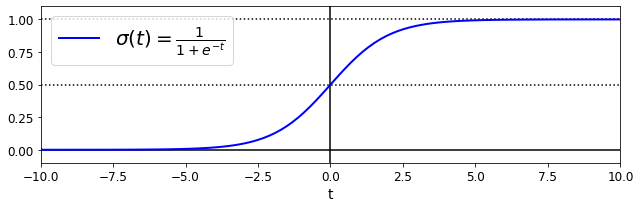

In [45]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}} $")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

Notice that $ \sigma (t) < 0.5 $ when $ t < 0 $, and $ \sigma (t) \ge 0.5 $ when $ t \ge 0 $, so a Logistic Regression model predicts $ 1 $ if $ \theta^T $. $ x $ is positive, and $ 0 $ if it is negative.

### Training and Cost Function

The objective of training is to set the parameter vector $ \theta $ so that the model estimates high probabilities for positive instances ($ y = 1 $) and low probabilities for negative instances ($ y = 0 $). This idea is captured by the cost function shown in the equation below for a single training instance $x$. 

**Equation 4-16. Cost function of a single training instance**

$$ \mathbf{c}( \theta ) = \begin{cases} -log( \hat{p} ) & if & y = 1, \\ -log( 1 - \hat{p} ) & if & y = 0. \end{cases} $$

This cost function makes sense because $ –log(t) $ grows very large when $ t $ approaches $ 0 $, so the cost will be large if the model estimates a probability close to $ 0 $ for a positive instance, and it will also be very large if the model estimates a probability close to $ 1 $ for a negative instance. On the other hand, $ –log(t) $ is close to $ 0 $ when $ t $ is close to $ 1 $, so the cost will be close to $ 0 $ if the estimated probability is close to $ 0 $ for a negative instance or close to $ 1 $ for a positive instance, which is precisely what we want.

The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression called the log loss, shown in equation below.

**Equation 4-17. Logistic Regression cost function (log loss)**

$$ \mathbf{J}( \theta ) = - \frac{1}{m} \sum _{i=1} ^{m} \left[ y^{(i)} log \left( \hat{p}^{(i)} \right) + \left( 1 - y^{(i)} \right) log \left( 1 - \hat{p}^{(i)} \right) \right] $$

The partial derivatives of the cost function with regards to the $ j^{th} $ model parameter $ \theta_j $ is given by equation below.

**Equation 4-18. Logistic cost function partial derivatives**

$$ \frac{ \partial }{ \partial \theta_j } J( \theta ) = \frac{1}{m} \sum _{i=1} ^{m} \left( \sigma \left( \theta^T . \mathbf{x}^{(i)} \right) - y^{(i)} \right) \mathbf{x}_j^{(i)} $$

### Decision Boundaries

Let’s use the **iris dataset** to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: **Iris-Setosa**, **Iris-Versicolor**, and **Iris-Virginica**.

Let's build a classifier to detect the **Iris-Virginica** type based only on the petal width feature. First let's load the data:

In [46]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [47]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

Now let's train a Logistic Regression model:

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm:

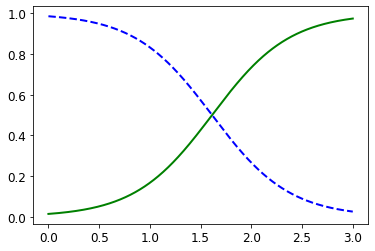

In [49]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

Saving figure logistic_regression_plot


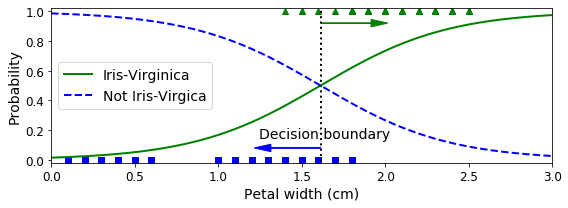

In [50]:
# More Matplotlib code to make the image look pretty
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virgica")
plt.text(decision_boundary+0.02, 0.15, "Decision boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [51]:
decision_boundary

array([1.61561562])

There is a decision boundary at around $ 1.6 $ cm where both probabilities are equal to $ 50$ %.

If we use `predict()` method rather than the `predict_proba()` method, it will return whichever class is the most likely. If the petal width is higher than $ 1.6 $ cm, the classifier will predict that the flower is an **Iris-Virginica**, or else it will predict that it is not (even if it is not very confident):

In [52]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Let's plot a linear decision boundary:

Saving figure logistic_regression_contour_plot


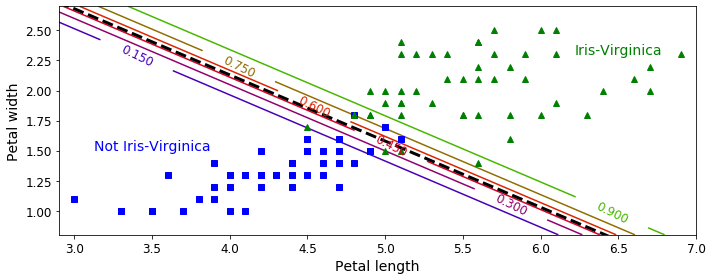

In [53]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0,x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

Just like the other linear models, Logistic Regression models can be regularized using $ ℓ1 $ or $ ℓ2 $ penalties.Scitkit-Learn actually adds an $ ℓ2 $ penalty by default.

The hyperparameter controlling the regularization strength of a Scikit-Learn `LogisticRegression` model is not alpha (as in other linear models), but its inverse: `C`. The higher the value of `C`, the less the model is regularized.

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called **Softmax Regression**, or **Multinomial Logistic Regression**.

The idea is quite simple: when given an instance $x$, the Softmax Regression model first computes a score $s_k(x)$ for each class $k$, then estimates the probability of each class by applying the **softmax function** (also called the **normalized exponential**) to the scores. The equation to compute $s_k(x)$ is given below:

**Equation 4-19. Softmax score for class k**

$$ \mathbf{s}_k(x) = \theta_k^{T} . \mathbf{x} $$

Note that each class has its own dedicated parameter vector $ \theta_k $. All these vectors are typically stored as rows in a *parameter matrix* $ Θ $.

Once you have computed the score of every class for the instance $x$, you can estimate the probability $ \hat{p}_k $ that the instance belongs to class $k$ by running the scores through the softmax function: it computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials).

**Equation 4-20. Softmax function**

$$ \hat{p}_k = \sigma \left( \mathbf{s} \left( \mathbf{x} \right) \right)_k = \frac{ \mathbf{exp} \left( \mathbf{s}_k \left( \mathbf{x} \right) \right) }{ \sum _{j = 1} ^{K} \mathbf{exp} \left( \mathbf{s}_j \left( \mathbf{x} \right) \right) } $$

where,
   * $K$ is the number of classes.
   * $ \mathbf{s} \left( \mathbf{x} \right) $ is a vector containing the scores of each class for the instance $x$.
   * $ \sigma \left( \mathbf{s} \left( \mathbf{x} \right) \right)_k $ is the estimated probability that the instance $x$ belongs to class $k$ given the scores of each class for that instance.
   
Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score), as shown in equation below.

**Equation 4-21. Softmax Regression classifier prediction**

$$ \hat{y} = \underbrace{argmax}_k \left( \sigma \left( \mathbf{s} \left( \mathbf{x} \right) \right)_k \right) = \underbrace{argmax}_k \left( \mathbf{s}_k \left( \mathbf{x} \right) \right) = \underbrace{argmax}_k \left( \theta_k^{T}. \mathbf{x} \right) $$

The $argmax$ operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability $ \sigma \left( \mathbf{s} \left( \mathbf{x} \right) \right)_k $.

The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions, let’s take a look at training. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function (also called the *cross entropy*), should lead to this objective because it penalizes the model when it estimates a low probability for a target class. *Cross entropy* is frequently used to measure how well a set of estimated class probabilities match the target classes (we will use it again several times in the following chapters).

**Equation 4-22. Cross entropy cost function**

$$ J \left( \Theta \right) = - \frac{1}{m} \sum _{i = 1} ^{m} \sum _{k = 1} ^{K} \mathbf{y}_k^{(i)} . log \left( \mathbf{\hat{p}}_k^{(i)} \right) $$

where, 
   * $ \mathbf{y}_k^{(i)} $ is equal to $1$ if the target class for the $ i^{th} $ instance is $k$; otherwise, it is equal to $0$.
   
Note that when there are just two classes ($K = 2$), this cost function is equivalent to the Logistic Regression’s cost function.

The gradient vector of this cost function with regards to $ \theta_k $ is given by the equation below:

**Equation 4-23. Cross entropy gradient vector for class k**

$$ \nabla_{\theta_k} J \left( \Theta \right) = \frac{1}{\mathbf{m}} \sum _{i = 1} ^{m} \left( \mathbf{ \hat{p}_k^{(i)} - y_k^{(i)} } \right) \mathbf{x}^{(i)} $$

Now we can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix $ \Theta $ that minimizes the cost function.

Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn’s `LogisticRegression` uses one-versus-all by default when you train it on more than two classes, but we can set the `multi_class` hyperparameter to `"multinomial"` to switch it to Softmax Regression instead. We must also specify a solver that supports Softmax Regression, such as the `"lbfgs"` solver. It also applies $ℓ_2$ regularization by default, which we can control using the hyperparameter `C`:

In [54]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
softmax_reg.predict([[5, 2]])

array([2])

In [56]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

The model estimates that an iris with $5$ cm long and $2$ cm  is **Iris-Virginica (class 2) with 94.2% probability** (or Iris-Versicolor with 5.8% probability).

Saving figure softmax_regression_contour_plot


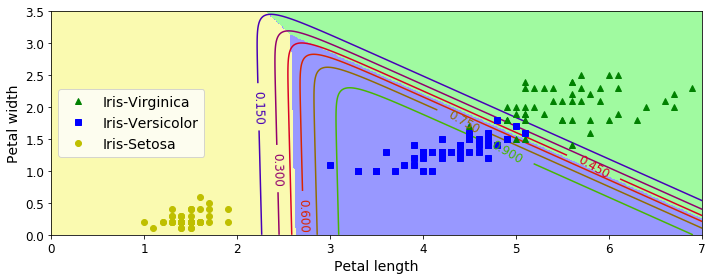

In [57]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

## Exercise Solutions 

### 12. Batch Gradient Descent with early stopping for Softmax Regression 

(without using Scikit-Learn)

Let's start by loading the data. We will reuse the iris dataset we loaded earlier:

In [58]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

We need to add the bias term for every instance $ (x_0 = 1) $:

In [59]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

Let's set the random seed so the output of this exercise solution is reproducible:

In [60]:
np.random.seed(2042)

Let's split the dataset into training set and validation set.

In [61]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices(0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of probabilities for a given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [62]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y) 
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Let's test this function on the first 10 instances:

In [63]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [64]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [75]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now, let's implement the Softmax function. It is defined by the following equation:

$$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$$

In [76]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

Let's define the number of inputs and outputs:

In [77]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train)) # == 3 (3 iris classes)
print(n_inputs, n_outputs)

3 3


The next equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

and the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [78]:
eta = 0.01 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 4.742639033914859
500 0.7216880823119456
1000 0.6204887212670228
1500 0.5578624004739455
2000 0.5145425566126579
2500 0.4821902740010116
3000 0.4566988357061257
3500 0.43582117185672764
4000 0.41822219905237085
4500 0.4030556709445118
5000 0.3897567987663698


The Softmax model is trained. Let's look at the model parameters:

In [79]:
Theta

array([[ 4.29312369,  0.03073838, -1.97193784],
       [-1.0965798 ,  0.32806673,  0.07745712],
       [-0.11010737,  0.35188545,  2.42549367]])

Let's make predictions for the validation set and check the accuracy score:

In [80]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $ \ell_2 $ regularization. The following code is similar to the one above, but the loss now has an additional $ \ell_2 $ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`:

In [81]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.3146667923694895
500 0.5378947790755033
1000 0.5046573947978396
1500 0.49505389686784407
2000 0.4914430657465935
2500 0.4899610932392464
3000 0.48932601099063844
3500 0.48904708136462205
4000 0.4889227267817381
4500 0.48886675809144253
5000 0.48884141287504024


Because of the additional $ \ell_2 $ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [82]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Perfect accuracy!

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing:

In [83]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping")
        break

0 1.4586514695641897
500 0.5603809070579141
1000 0.5401156174519326
1500 0.5345862586106912
2000 0.5329279189467603
2500 0.5325551999881963
2631 0.5325447576940657
2632 0.5325447585230719 early stopping


In [84]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still perfect, but faster

Now let's plot the model's predictions on the whole dataset:

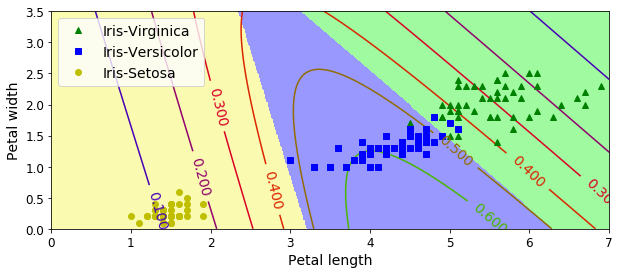

In [85]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

And now let's measure the final model's accuracy on the test set:

In [86]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

Our perfect model turns out to have slight imperfections. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.